Text(0, 0.5, 'Frequency')

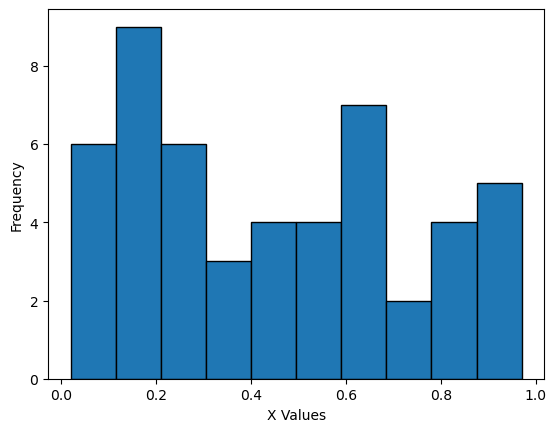

In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Creating dummy data

np.random.seed(42)
x = np.random.rand(50)
plt.hist(x, bins=10, edgecolor="black")
plt.xlabel("X Values")
plt.ylabel("Frequency")

Text(0, 0.5, 'Corresponding Y')

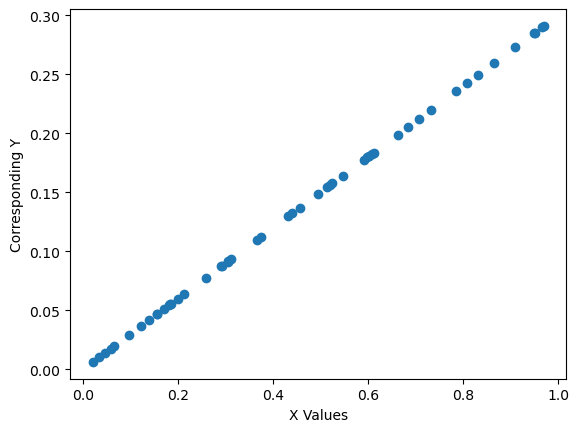

In [4]:
### Lets Create Sample Y data
### Define Slope
m = 0.3
y = x * m

plt.scatter(x=x, y=y)
plt.xlabel("X Values")
plt.ylabel("Corresponding Y")

Linear Regression using Gradient Desent

Θ(t+1) = Θ(t) - (α) ∑(ΘT.X - Y).X


In [5]:
import numpy as np


class LinearRegressionUsingGradientDescent:
    def __init__(
        self,
        step_size=0.09,
        max_iter=500,
        eps=1e-5,
        theta_0=None,
    ):
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps

    def loss_function(self, x, y):
        loss = 0.5 * np.sum((x.dot(self.theta) - y) ** 2)
        return loss

    def fit(self, x, y):
        m = x.shape[0]  # Number of data points

        # Initialize Theta
        if self.theta is None:
            self.theta = np.zeros(
                x.shape[1]
            )  # Shape should match the number of features

        for i in range(self.max_iter):
            prev_theta = np.copy(self.theta)
            gradient = x.T.dot(x.dot(self.theta) - y)
            self.theta = prev_theta - self.step_size * gradient
            loss = self.loss_function(x, y)
            print(f"Loss in iteration {i}: {loss}")
            print(f"Theta: {self.theta}")

            if np.all(np.abs(self.theta - prev_theta) < self.eps):
                print("Converged.")
                break

In [6]:
model = LinearRegressionUsingGradientDescent()
model.fit(x[:, np.newaxis], y)  # Reshape x to a column vector

Loss in iteration 0: 0.043623958936930426
Theta: [0.37885396]
Loss in iteration 1: 0.003013905091392
Theta: [0.27927351]
Loss in iteration 2: 0.00020822557423207365
Theta: [0.30544789]
Loss in iteration 3: 1.4385950602130603e-05
Theta: [0.29856804]
Loss in iteration 4: 9.939008476272653e-07
Theta: [0.30037639]
Loss in iteration 5: 6.866691831732632e-08
Theta: [0.29990107]
Loss in iteration 6: 4.744080541282038e-09
Theta: [0.300026]
Loss in iteration 7: 3.277604519559933e-10
Theta: [0.29999316]
Loss in iteration 8: 2.2644411900520484e-11
Theta: [0.3000018]
Converged.


Linera Regression Using Stochastic Gradient Descent(SGD)

In Gradient Descent we computed the Loss Function after every iteration but in this we fix the loss functon value.

Θ(t+1) = Θ(t) - (α)(Loss Functon)


In [7]:
### Let the Loss Function be
loss = 3.277604519559933e-10


class LinearRegressionUsingSGD:
    def __init__(
        self,
        step_size=0.08,
        max_iter=500,
        eps=1e-5,
        theta_0=None,
        loss=1.4385950602130603e-05,
    ):
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.loss = loss
    
    def fit(self, x, y):
        if self.theta is None:
            self.theta = np.zeros(
                x.shape[1]
            ) 

        for i in range(self.max_iter):
            prev_theta = np.copy(self.theta)
            self.theta = self.theta - self.step_size*self.loss
            
            print(f"Loss in iteration {i}: {loss}")
            print(f"Theta: {self.theta}")

            if np.all(np.abs(self.theta - prev_theta) < self.eps):
                print("Converged.")
                break
    
    def loss_function(self, x, y):
        loss = 0.5 * np.sum((x.dot(self.theta) - y) ** 2)
        return loss

In [8]:
sgd = LinearRegressionUsingSGD()
sgd.fit(x[:, np.newaxis], y)

Loss in iteration 0: 3.277604519559933e-10
Theta: [-1.15087605e-06]
Converged.


Linear Regression Using Probabilistic Approach

We consider Linear Regression as a Normal Distribution and this gives Θ as ∑yx/∑(x)^2

In [9]:
m_predict = np.sum(x*y)/np.sum(x**2)
print(m_predict)


0.30000000000000004


Now Lets use Sklearn Fr this data

In [12]:
from sklearn.linear_model import LinearRegression

skModel = LinearRegression()
skModel.fit(x[:, np.newaxis],y)

skModel.coef_

array([0.3])